In [9]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
%cd /content/gdrive/MyDrive/skin-cancer/

/content/gdrive/MyDrive/skin-cancer


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/skin-cancer/"

In [ ]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 99% 321M/325M [00:03<00:00, 81.1MB/s]
100% 325M/325M [00:03<00:00, 91.9MB/s]


In [ ]:
!unzip "/content/gdrive/MyDrive/skin-cancer/skin-cancer-malignant-vs-benign.zip"

Streaming output truncated to the last 5000 lines.
  inflating: data/train/benign/420.jpg  
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447.jpg  
  infla

In [10]:
#import libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras
from tensorflow.keras.applications import VGG19,Xception,VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam # - Works, RMSprop
from keras.preprocessing.image import ImageDataGenerator
#from keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from keras import layers
import tensorflow as tf

In [11]:
#import  train test data 
## loading training set
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip =  True , 
                                   rotation_range=40,
                                   brightness_range = (0.5, 1.5),
                                   horizontal_flip = True)

train_data = train_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/skin-cancer/train',   target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)


## loading validation dataset
test_datagen =  ImageDataGenerator(rescale=1/255)
test_data =   test_datagen.flow_from_directory(
    '/content/gdrive/MyDrive/skin-cancer/test',   target_size = (64, 64),
                                                 class_mode='sparse',
                                                 shuffle=True,seed=1)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [12]:
#display classes names
class_names = ["Benign","Malignant"]
for i in class_names :
    print(class_names.index(i),"  ",i)

0    Benign
1    Malignant


benign


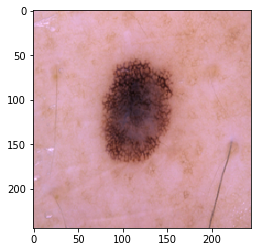

In [13]:
from keras.preprocessing import image
import numpy as np
image_path = "/content/gdrive/MyDrive/skin-cancer/train/benign/100.jpg"
new_img = image.load_img(image_path, target_size=(244, 244))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
print("benign")
plt.imshow(new_img)

In [14]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.15),
  layers.Dense(2, activation= 'softmax')
])

In [15]:
#compile the model
import tensorflow as tf
model.compile(optimizer="adam", loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

#early stopping function
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=7)

In [16]:
#fit the model
histroy=model.fit(train_data,
    validation_data = test_data, 
    callbacks=[early],
    epochs = 50)

Epoch 1/50
83/83 [==============================] - 239s 3s/step - loss: 0.5836 - accuracy: 0.6841 - val_loss: 0.6374 - val_accuracy: 0.6561
Epoch 2/50
83/83 [==============================] - 13s 155ms/step - loss: 0.4948 - accuracy: 0.7664 - val_loss: 0.5686 - val_accuracy: 0.7561
Epoch 3/50
83/83 [==============================] - 13s 156ms/step - loss: 0.4665 - accuracy: 0.7785 - val_loss: 0.5044 - val_accuracy: 0.7818
Epoch 4/50
83/83 [==============================] - 13s 156ms/step - loss: 0.4436 - accuracy: 0.7797 - val_loss: 0.4119 - val_accuracy: 0.8182
Epoch 5/50
83/83 [==============================] - 13s 155ms/step - loss: 0.4451 - accuracy: 0.7907 - val_loss: 0.5236 - val_accuracy: 0.7348
Epoch 6/50
83/83 [==============================] - 13s 156ms/step - loss: 0.4351 - accuracy: 0.7797 - val_loss: 0.4232 - val_accuracy: 0.7803
Epoch 7/50
83/83 [==============================] - 14s 166ms/step - loss: 0.4507 - accuracy: 0.7755 - val_loss: 0.5480 - val_accuracy: 0.7864
E

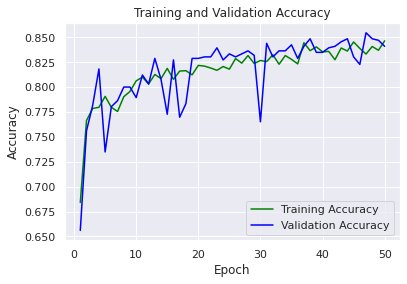

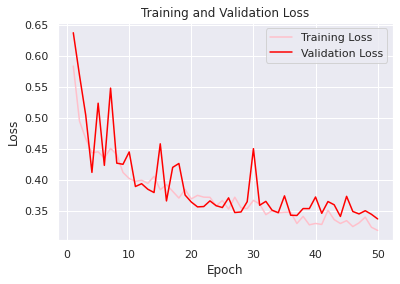

In [17]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = histroy.history['accuracy']
val_acc = histroy.history['val_accuracy']
loss = histroy.history['loss']
val_loss = histroy.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [18]:
#predict val data
y_pred = model.predict(test_data)
y_pred =  np.argmax(y_pred,axis=1)

print(y_pred)

[1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1
 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1
 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0
 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0
 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1
 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1
 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1
 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1
 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 0
 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1
 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0
 1 1 0 1 0 0 1 1 0 1 0 1 

[1]
Malignant


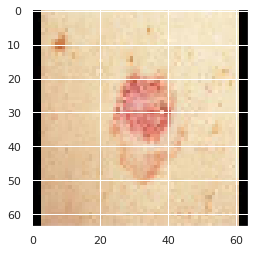

In [29]:
#example 1
from keras.preprocessing import image
import numpy as np
image_path = "/content/images.jpg"
new_img = image.load_img(image_path, target_size=(64, 64))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(class_names[prediction[0]])
plt.imshow(new_img)

In [30]:
model.save("/content/gdrive/MyDrive/skin-cancer/h5_skin/skin-cancer.h5")